# 6.6 Sourcing & Analyzing Time Series Data

## Contents

### Importing libraries and data
### Subsetting, wrangling and cleaning time-seried
### Times series analysis
### Testing for stationary
### Stationarizing

In [45]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [47]:
# import dataframe

path = 'C:/Users/Jack Bartman/OneDrive/CareerFoundry/MV Trips'

In [49]:
tripS = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Trips_by_Distance_state_wrangeled.csv'))

In [13]:
tripS.shape

(98073, 24)

In [17]:
tripS.head(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,State
0,0,887,887,State,2019/01/01,NV,NaN,753054.0,2272063.0,9139676.0,...,1108436.0,222837.0,93301.0,73578.0,24471.0,18427.0,32-00000-20190101,0,1,Nevada
1,1,888,888,State,2019/01/01,FL,NaN,4524666.0,16709556.0,55258300.0,...,6604304.0,2113009.0,796740.0,412224.0,95341.0,93887.0,12-00000-20190101,0,1,Florida
2,2,889,889,State,2019/01/01,DC,NaN,241030.0,459278.0,3114055.0,...,183744.0,42096.0,10730.0,8109.0,3476.0,5616.0,11-00000-20190101,0,1,District of Columbia
3,3,890,890,State,2019/01/01,DE,NaN,224457.0,739757.0,2420942.0,...,314102.0,128454.0,50542.0,22701.0,2474.0,2198.0,10-00000-20190101,0,1,Delaware
4,4,891,891,State,2019/01/01,CT,NaN,853894.0,2707851.0,9468961.0,...,1211252.0,449947.0,192960.0,56618.0,12031.0,31268.0,09-00000-20190101,0,1,Connecticut


### subset dataframe

In [51]:
dfsub=tripS[['Date', 'State Postal Code', 'Number of Trips']]

In [22]:
dfsub.head(5)

,Date,State Postal Code,Number of Trips
0,2019/01/01,NV,9139676.0
1,2019/01/01,FL,55258300.0
2,2019/01/01,DC,3114055.0
3,2019/01/01,DE,2420942.0
4,2019/01/01,CT,9468961.0


In [ ]:
# Create a dfsub3 that only contains the date and number of trips in California

In [53]:
dfsub2=dfsub[dfsub['State Postal Code']=='CA']

In [55]:
dfsub2.head(5)

,Date,State Postal Code,Number of Trips
30,2019/01/01,CA,111648618.0
63,2019/01/02,CA,139079128.0
115,2019/01/03,CA,140219864.0
163,2019/01/04,CA,140800552.0
241,2019/01/05,CA,140734892.0


In [57]:
dfsub3=dfsub2[['Date', 'Number of Trips']]

In [18]:
dfsub3.head(5)

,Date,Number of Trips
30,2019/01/01,111648618.0
63,2019/01/02,139079128.0
115,2019/01/03,140219864.0
163,2019/01/04,140800552.0
241,2019/01/05,140734892.0


In [59]:
# Set the "Date" column as the index

from datetime import datetime

dfsub3['datetime'] = pd.to_datetime(dfsub3['Date']) # Create a datetime column from "Date.""
dfsub3 = dfsub3.set_index('datetime') # Set the datetime as the index of the dataframe.
dfsub3.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
dfsub3.head()

,Number of Trips
datetime,
2019-01-01,111648618.0
2019-01-02,139079128.0
2019-01-03,140219864.0
2019-01-04,140800552.0
2019-01-05,140734892.0


### This subset creates a straight forword dataframe of a varible funtion over time 

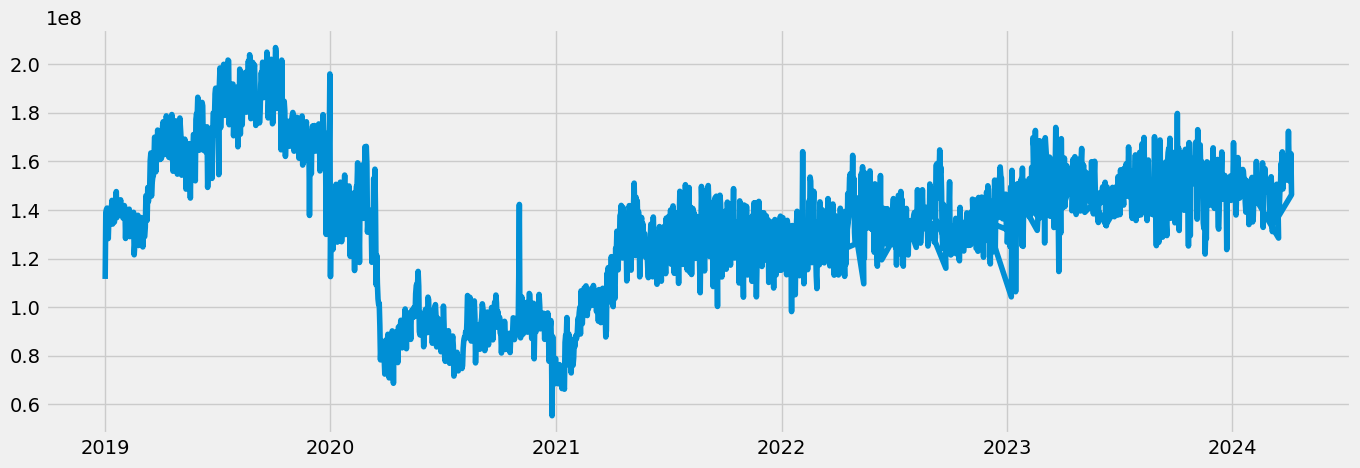

In [22]:
# Plot the dataframe

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(dfsub3)

In [39]:
dfsub3.shape

(1923, 1)

In [45]:
# Check for missing values

dfsub3.isnull().sum()

Number of Trips    0
dtype: int64

In [49]:
# Check for duplicates

dups = dfsub3.duplicated()
dups.sum()

0

In [51]:
# No dups

### Time- Series analysis: decomposition

In [63]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(dfsub3, model='additive', period=7)

In [67]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

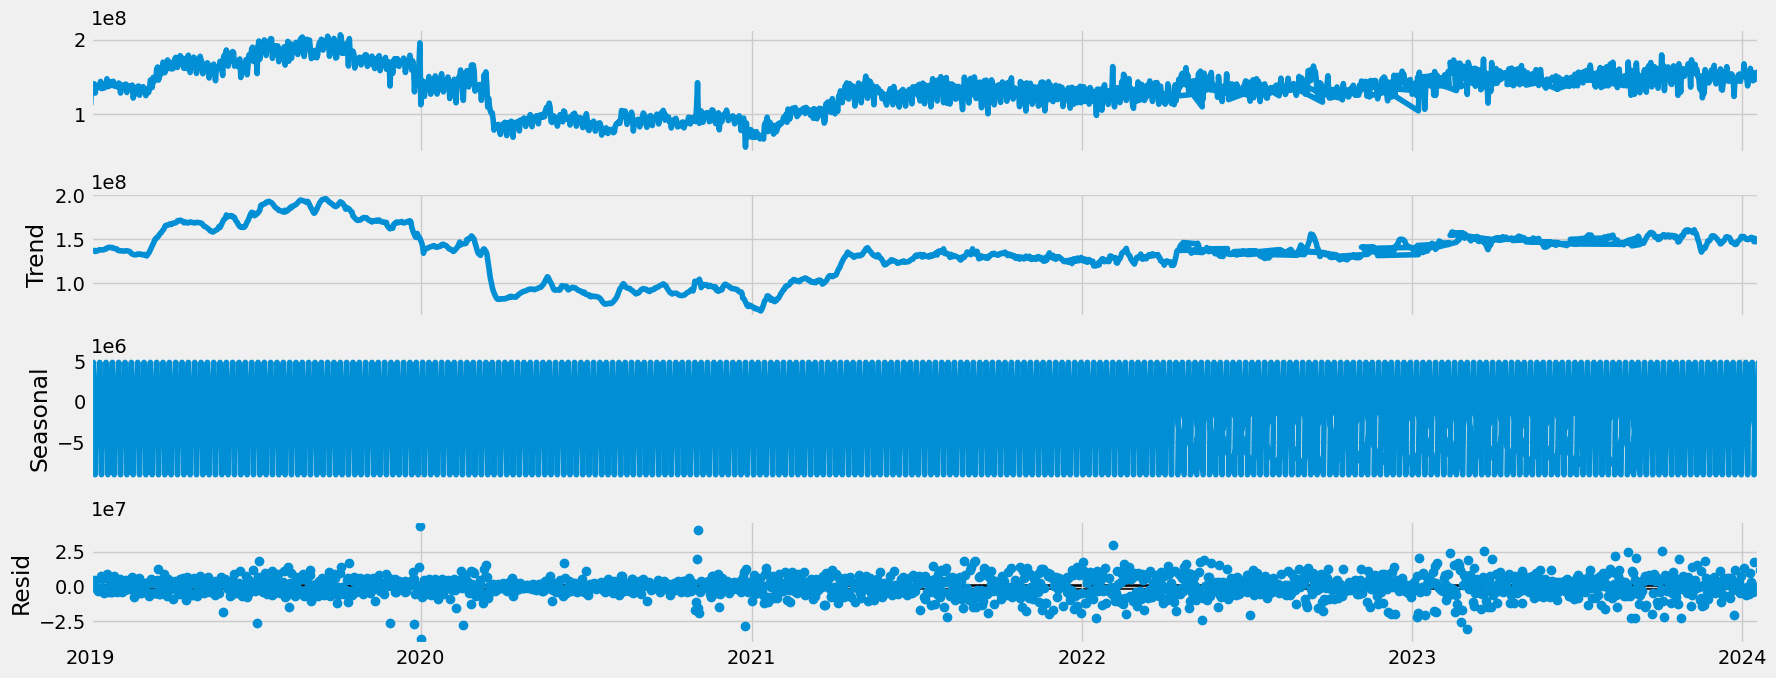

In [69]:
# Plot the separate components

decomposition.plot()
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(dfsub3['Number of Trips'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.797992
p-value                           0.381459
Number of Lags Used              23.000000
Number of Observations Used    1899.000000
Critical Value (1%)              -3.433798
Critical Value (5%)              -2.863063
Critical Value (10%)             -2.567581
dtype: float64


In [28]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(dfsub3['Number of Trips'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.797992
p-value                           0.381459
Number of Lags Used              23.000000
Number of Observations Used    1899.000000
Critical Value (1%)              -3.433798
Critical Value (5%)              -2.863063
Critical Value (10%)             -2.567581
dtype: float64


### The test statistic is larger than the critical value, so the null hypothesis cannot be rejected and the data is non-stationary 

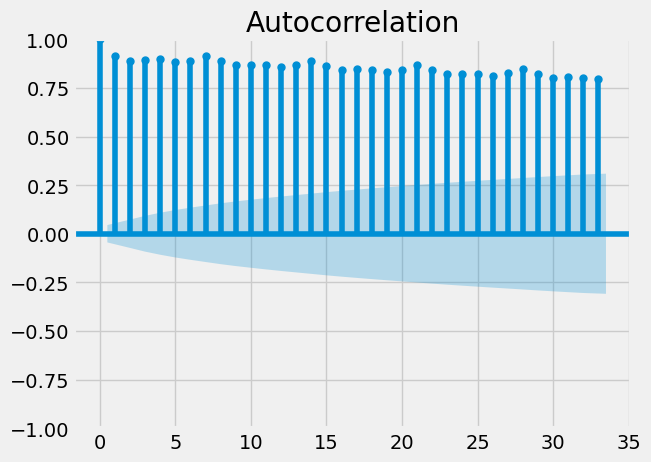

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(dfsub3)
plt.show()

## Stationarizing

In [35]:
data_diff = dfsub3 - dfsub3.shift(1)

In [37]:
data_diff.dropna(inplace = True)

In [39]:
data_diff.head()

,Number of Trips
datetime,
2019-01-02,27430510.0
2019-01-03,1140736.0
2019-01-04,580688.0
2019-01-05,-65660.0
2019-01-06,-12468469.0


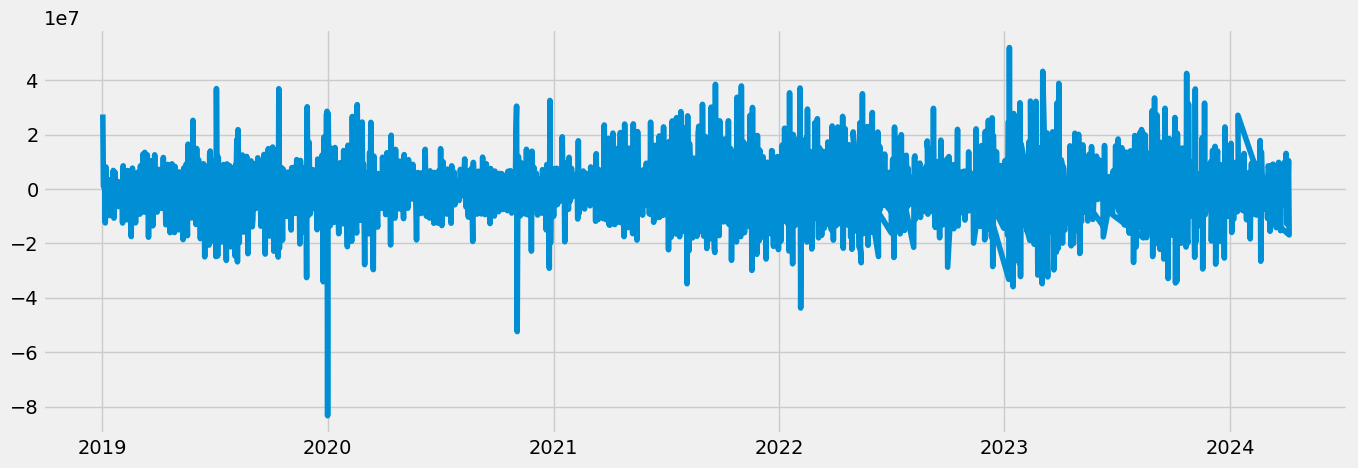

In [41]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [43]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.115030e+01
p-value                        2.955195e-20
Number of Lags Used            2.600000e+01
Number of Observations Used    1.895000e+03
Critical Value (1%)           -3.433806e+00
Critical Value (5%)           -2.863066e+00
Critical Value (10%)          -2.567583e+00
dtype: float64


### The test statistic is smaller than the critical value at both the 5% and 10%, p<0.05, the null hypothesis can be rejected and the series is stationary.